In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv")
data.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [54]:
data.columns = data.columns.str.replace("\\/","_")  #regex replace
data.columns

Index(['Date', 'Country_Region', 'Province_State', 'Confirmed', 'Recovered',
       'Deaths'],
      dtype='object')

In [55]:
Afghanistan = data[data.Country_Region == "Afghanistan"]


country_data = dict()
for country in set(data.Country_Region):
    country_data[country] = data[data.Country_Region==country]


In [32]:
country_data

{'Afghanistan':            Date Country_Region Province_State  Confirmed  Recovered  Deaths
 0    2020-01-22    Afghanistan            NaN          0        0.0       0
 1    2020-01-23    Afghanistan            NaN          0        0.0       0
 2    2020-01-24    Afghanistan            NaN          0        0.0       0
 3    2020-01-25    Afghanistan            NaN          0        0.0       0
 4    2020-01-26    Afghanistan            NaN          0        0.0       0
 ..          ...            ...            ...        ...        ...     ...
 316  2020-12-03    Afghanistan            NaN      46837    37260.0    1846
 317  2020-12-04    Afghanistan            NaN      46837    37260.0    1846
 318  2020-12-05    Afghanistan            NaN      47072    37393.0    1864
 319  2020-12-06    Afghanistan            NaN      47306    37685.0    1874
 320  2020-12-07    Afghanistan            NaN      47516    37879.0    1900
 
 [321 rows x 6 columns],
 'Kyrgyzstan':              Date C

In [56]:
Afghanistan.describe()

,Confirmed,Recovered,Deaths
count,321.000000,321.000000,321.000000
mean,22716.931464,15738.797508,772.457944
std,18109.471656,15071.986523,678.606434
min,0.000000,0.000000,0.000000
25%,556.000000,32.000000,18.000000
50%,31507.000000,14131.000000,752.000000
75%,38897.000000,32576.000000,1439.000000
max,47516.000000,37879.000000,1900.000000


In [57]:
country_data["India"]

,Date,Country_Region,Province_State,Confirmed,Recovered,Deaths
46545,2020-01-22,India,NaN,0,0.0,0
46546,2020-01-23,India,NaN,0,0.0,0
46547,2020-01-24,India,NaN,0,0.0,0
46548,2020-01-25,India,NaN,0,0.0,0
46549,2020-01-26,India,NaN,0,0.0,0
...,...,...,...,...,...,...
46861,2020-12-03,India,NaN,9571559,9016289.0,139188
46862,2020-12-04,India,NaN,9608211,9058822.0,139700
46863,2020-12-05,India,NaN,9644222,9100792.0,140182
46864,2020-12-06,India,NaN,9677203,9139901.0,140573


In [43]:
country_data["India"].describe()

,Confirmed,Recovered,Deaths
count,3.210000e+02,3.210000e+02,321.000000
mean,2.627770e+06,2.247150e+06,42617.501558
std,3.327626e+06,3.043663e+06,49145.179393
min,0.000000e+00,0.000000e+00,0.000000
25%,8.446000e+03,9.690000e+02,288.000000
50%,5.854810e+05,3.479120e+05,17400.000000
75%,5.308014e+06,4.208431e+06,85619.000000
max,9.703770e+06,9.178946e+06,140958.000000


In [58]:
country_data["India"].isnull().sum()

Date                0
Country_Region      0
Province_State    321
Confirmed           0
Recovered           0
Deaths              0
dtype: int64

# Relating the Variables with scatter plots


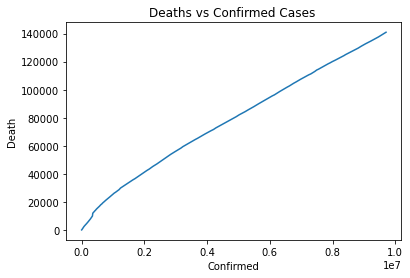

In [64]:
plt.plot(country_data["India"].Confirmed , country_data["India"].Deaths )
plt.xlabel("Confirmed")
plt.ylabel("Death") 
plt.title("Deaths vs Confirmed Cases ")
plt.show()




# Cases & Death with time 

In [85]:
x_ticks = country_data["India"].Date[::30]
print(x_ticks)

46545    2020-01-22
46575    2020-02-21
46605    2020-03-22
46635    2020-04-21
46665    2020-05-21
46695    2020-06-20
46725    2020-07-20
46755    2020-08-19
46785    2020-09-18
46815    2020-10-18
46845    2020-11-17
Name: Date, dtype: object


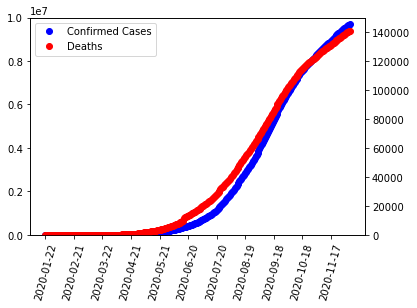

In [122]:
fig, ax = plt.subplots(1,1)
graph1 = ax.plot_date(country_data["India"].Date , country_data["India"].Confirmed, color="blue", label = "Confirmed Cases")

ax.set_ylim(0,10000000) 
ax.xaxis.set_tick_params(rotation=75, labelsize=10)
ax.set_xticks(x_ticks)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

graph2 = ax2.plot_date(country_data["India"].Date , country_data["India"].Deaths, color="red", label = "Deaths")
ax2.xaxis.set_tick_params(rotation=75, labelsize=10)
ax2.set_xticks(x_ticks)


ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylim(0,150000)




lns = graph1 + graph2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)


plt.show()